In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
solar_1 = pd.read_excel('/Users/jack/Library/CloudStorage/GoogleDrive-limjackailjk@gmail.com/My Drive/Solar PV Lab/NIMBY Project/data collection/data/Solar/3_3_Solar_Y2021.xlsx')
solar_2 = pd.read_csv("/Users/jack/Library/CloudStorage/GoogleDrive-limjackailjk@gmail.com/My Drive/Solar PV Lab/NIMBY Project/data collection/data/Solar/ez_gis.plant_power_eia_v8_solar.csv")
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
solar_2.head()

,plant_code,plant_name,utility_na,utility_id,sector_nam,city,county,statename,zip,street_add,primsource,install_mw,total_mw,solar_mw,source_des,tech_desc,source,period,latitude,longitude,WKT,Unnamed: 21
0,10029,General Electric Aircraft Engines,General Electric Aircraft Engines,7049,Industrial Non-CHP,Lynn,Essex,Massachusetts,1910,1000 Western Avenue,solar,2.1,2.1,2.1,Solar = 2.1 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",202108,42.450000,-70.973900,POINT Z (-70.9739 42.450000000000074 0),Massachusetts
1,10437,Sunray 2,"Sunray Energy 2, LLC",60246,IPP Non-CHP,Daggett,San Bernardino,California,92327,35100 Santa Fe Street,solar,20.0,20.0,20.0,Solar = 20 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",202108,34.863356,-116.827627,POINT Z (-116.82762700000005 34.86335600000007...,California
2,10438,Sunray 3,Sunray Energy 3 LLC,60247,IPP Non-CHP,Daggett,San Bernardino,California,92327,35100 Santa Fe St,solar,13.8,13.8,13.8,Solar = 13.8 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",202108,34.863356,-116.827627,POINT Z (-116.82762700000005 34.86335600000007...,Arizona
3,10444,SEGS VIII,Terra-Gen Operating Co-Solar,61950,IPP Non-CHP,Hinkley,San Bernardino,California,92347,43880 Harper Lake Road,solar,92.0,80.0,80.0,Solar = 80 MW,Solar Thermal without Energy Storage,"EIA-860, EIA-860M and EIA-923",202108,35.030800,-117.356300,POINT Z (-117.35630000000009 35.03080000000018 0),Nevada
4,10446,SEGS IX,Terra-Gen Operating Co-Solar,61950,IPP Non-CHP,Hinkley,San Bernardino,California,92347,43880 Harper Lake Road,solar,92.0,88.0,88.0,Solar = 88 MW,Solar Thermal without Energy Storage,"EIA-860, EIA-860M and EIA-923",202108,35.033000,-117.338000,POINT Z (-117.33800000000005 35.0330000000001 0),Colorado


In [4]:
operating_years = solar_1['Operating Year'].unique()
solar_1_important = solar_1[['State', 'County', 'Operating Year', 'Nameplate Capacity (MW)']]
solar_1_important['State'] = solar_1_important['State'].map(get_state_abbr())

NameError: name 'get_state_abbr' is not defined

In [5]:
dfs = {}
for operating_year in operating_years:
    grouped = solar_1_important[solar_1_important['Operating Year'] == operating_year].drop(columns=['Operating Year']).groupby(['State', 'County'])
    grouped_summed = grouped.sum().reset_index()
    grouped_mean = grouped.mean().reset_index()
    grouped_count = grouped.count().reset_index()
    
    merged = grouped_summed.merge(grouped_mean, on=['State', 'County'], suffixes=('_sum', '_mean')).merge(grouped_count, on=['State', 'County']).rename(columns={'Nameplate Capacity (MW)_sum': 'Nameplate Capacity (MW) sum', 'Nameplate Capacity (MW)_mean': 'Nameplate Capacity (MW) mean', 'Nameplate Capacity (MW)': 'Number of Plants'})
    
    dfs[operating_year] = merged

In [ ]:
solar_2.head()

In [ ]:
# groupby state and county pairs and sum the capacity
solar_2_grouped = solar_2[['statename', 'county', 'solar_mw']].groupby(['statename', 'county'])

solar_sum_all = solar_2_grouped.sum().reset_index()
solar_avg_all = solar_2_grouped.mean().reset_index()
solar_count_all = solar_2_grouped.count().reset_index()

solar_2 = solar_2[['statename', 'county', 'solar_mw']]
solar_less_than_5 = solar_2[solar_2['solar_mw'] < 5].groupby(['statename', 'county'])
solar_more_than_5_less_than_25 = solar_2[(solar_2['solar_mw'] >= 5) & (solar_2['solar_mw'] < 25)].groupby(['statename', 'county'])
solar_more_than_25 = solar_2[solar_2['solar_mw'] >= 25].groupby(['statename', 'county'])

solar_sum_less_than_5 = solar_less_than_5.sum().reset_index()
solar_avg_less_than_5 = solar_less_than_5.mean().reset_index()
solar_count_less_than_5 = solar_less_than_5.count().reset_index()

solar_sum_more_than_5_less_than_25 = solar_more_than_5_less_than_25.sum().reset_index()
solar_avg_more_than_5_less_than_25 = solar_more_than_5_less_than_25.mean().reset_index()
solar_count_more_than_5_less_than_25 = solar_more_than_5_less_than_25.count().reset_index()

solar_sum_more_than_25 = solar_more_than_25.sum().reset_index()
solar_avg_more_than_25 = solar_more_than_25.mean().reset_index()
solar_count_more_than_25 = solar_more_than_25.count().reset_index()

solar_merged_all = solar_sum_all.merge(solar_avg_all, on=['statename', 'county'], suffixes=('_sum', '_avg')).merge(solar_count_all, on=['statename', 'county'])

solar_merged_less_than_5 = solar_sum_less_than_5.merge(solar_avg_less_than_5, on=['statename', 'county'], suffixes=('_sum', '_avg')).merge(solar_count_less_than_5, on=['statename', 'county'])

solar_merged_more_than_5_less_than_25 = solar_sum_more_than_5_less_than_25.merge(solar_avg_more_than_5_less_than_25, on=['statename', 'county'], suffixes=('_sum', '_avg')).merge(solar_count_more_than_5_less_than_25, on=['statename', 'county'])

solar_merged_more_than_25 = solar_sum_more_than_25.merge(solar_avg_more_than_25, on=['statename', 'county'], suffixes=('_sum', '_avg')).merge(solar_count_more_than_25, on=['statename', 'county'])


solar_merged_all.columns = ['state', 'county', 'solar_mw_sum_all', 'solar_mw_avg_all', 'solar_mw_count_all']
solar_merged_less_than_5.columns = ['state', 'county', 'solar_mw_sum_less_than_5', 'solar_mw_avg_less_than_5', 'solar_mw_count_less_than_5']
solar_merged_more_than_5_less_than_25.columns = ['state', 'county', 'solar_mw_sum_more_than_5_less_than_25', 'solar_mw_avg_more_than_5_less_than_25', 'solar_mw_count_more_than_5_less_than_25']
solar_merged_more_than_25.columns = ['state', 'county', 'solar_mw_sum_more_than_25', 'solar_mw_avg_more_than_25', 'solar_mw_count_more_than_25']

solar_merged_less_than_5

## Block Group

In [6]:
solar_2.head()

,plant_code,plant_name,utility_na,utility_id,sector_nam,city,county,statename,zip,street_add,primsource,install_mw,total_mw,solar_mw,source_des,tech_desc,source,period,latitude,longitude,WKT,Unnamed: 21
0,10029,General Electric Aircraft Engines,General Electric Aircraft Engines,7049,Industrial Non-CHP,Lynn,Essex,Massachusetts,1910,1000 Western Avenue,solar,2.1,2.1,2.1,Solar = 2.1 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",202108,42.450000,-70.973900,POINT Z (-70.9739 42.450000000000074 0),Massachusetts
1,10437,Sunray 2,"Sunray Energy 2, LLC",60246,IPP Non-CHP,Daggett,San Bernardino,California,92327,35100 Santa Fe Street,solar,20.0,20.0,20.0,Solar = 20 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",202108,34.863356,-116.827627,POINT Z (-116.82762700000005 34.86335600000007...,California
2,10438,Sunray 3,Sunray Energy 3 LLC,60247,IPP Non-CHP,Daggett,San Bernardino,California,92327,35100 Santa Fe St,solar,13.8,13.8,13.8,Solar = 13.8 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",202108,34.863356,-116.827627,POINT Z (-116.82762700000005 34.86335600000007...,Arizona
3,10444,SEGS VIII,Terra-Gen Operating Co-Solar,61950,IPP Non-CHP,Hinkley,San Bernardino,California,92347,43880 Harper Lake Road,solar,92.0,80.0,80.0,Solar = 80 MW,Solar Thermal without Energy Storage,"EIA-860, EIA-860M and EIA-923",202108,35.030800,-117.356300,POINT Z (-117.35630000000009 35.03080000000018 0),Nevada
4,10446,SEGS IX,Terra-Gen Operating Co-Solar,61950,IPP Non-CHP,Hinkley,San Bernardino,California,92347,43880 Harper Lake Road,solar,92.0,88.0,88.0,Solar = 88 MW,Solar Thermal without Energy Storage,"EIA-860, EIA-860M and EIA-923",202108,35.033000,-117.338000,POINT Z (-117.33800000000005 35.0330000000001 0),Colorado


In [7]:
block_group_bb = gpd.read_file("/Users/jack/Downloads/US Boundary 500k/cb_2023_us_bg_500k.shp")
block_group_bb.head()

DriverError: /Users/jack/Downloads/US Boundary 500k/cb_2023_us_bg_500k.shp: No such file or directory

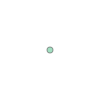

In [4]:
x = solar_2.iloc[0]['WKT']

import shapely as sp
import shapely.wkt as wkt

sp.wkt.loads(x)

In [5]:
# Intersecting the point x with all the geometries in the block group shapefile and find the one that intersects
block_group_bb[block_group_bb.intersects(sp.wkt.loads(x))]

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOIDFQ,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry
7806,25,009,207200,1,1500000US250092072001,250092072001,1,Block Group 1,BG,2164234,429346,"POLYGON ((-70.97149 42.45748, -70.97040 42.456..."


In [6]:
def get_GEOID_from_point(z, block_group_bb):
    intersect = block_group_bb[block_group_bb.intersects(sp.wkt.loads(z))]
    # Handle cases with no or multiple intersections
    if len(intersect) == 0:
        print(f"No intersection found for point: {z}")
        return (None, None, None, None, None)
    elif len(intersect) > 1:
        print(f"More than one intersection found for point: {z}")
        return (None, None, None, None, None)
    
    # Return the relevant details from the intersection
    x= (intersect.iloc[0]['GEOID'], 
            intersect.iloc[0]['STATEFP'], 
            intersect.iloc[0]['COUNTYFP'], 
            intersect.iloc[0]['TRACTCE'], 
            intersect.iloc[0]['BLKGRPCE'],
            intersect.iloc[0]['geometry'],
    )
    return x

In [7]:
# Applying the function to your dataset
solar_2[['GEOID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'geometry']] = solar_2['WKT'].apply(
    lambda x: pd.Series(get_GEOID_from_point(x, block_group_bb))
)
# solar_2.to_csv('temp.csv')

In [26]:
# make solar 2 into a gpd
solar_2_gpd = gpd.GeoDataFrame(solar_2, geometry='geometry')
# set the projection to the block group shapefile
solar_2_gpd.crs = block_group_bb.crs
solar_2_gpd.head()

,plant_code,plant_name,utility_na,utility_id,sector_nam,city,county,statename,zip,street_add,primsource,install_mw,total_mw,solar_mw,source_des,tech_desc,source,period,latitude,longitude,WKT,Unnamed: 21,GEOID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,geometry
0,10029,General Electric Aircraft Engines,General Electric Aircraft Engines,7049,Industrial Non-CHP,Lynn,Essex,Massachusetts,1910,1000 Western Avenue,solar,2.1,2.1,2.1,Solar = 2.1 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",202108,42.450000,-70.973900,POINT Z (-70.9739 42.450000000000074 0),Massachusetts,250092072001,25,009,207200,1,"POLYGON ((-70.97149 42.45748, -70.97040 42.456..."
1,10437,Sunray 2,"Sunray Energy 2, LLC",60246,IPP Non-CHP,Daggett,San Bernardino,California,92327,35100 Santa Fe Street,solar,20.0,20.0,20.0,Solar = 20 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",202108,34.863356,-116.827627,POINT Z (-116.82762700000005 34.86335600000007...,California,060710103004,06,071,010300,4,"POLYGON ((-116.87825 34.86337, -116.87064 34.8..."
2,10438,Sunray 3,Sunray Energy 3 LLC,60247,IPP Non-CHP,Daggett,San Bernardino,California,92327,35100 Santa Fe St,solar,13.8,13.8,13.8,Solar = 13.8 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",202108,34.863356,-116.827627,POINT Z (-116.82762700000005 34.86335600000007...,Arizona,060710103004,06,071,010300,4,"POLYGON ((-116.87825 34.86337, -116.87064 34.8..."
3,10444,SEGS VIII,Terra-Gen Operating Co-Solar,61950,IPP Non-CHP,Hinkley,San Bernardino,California,92347,43880 Harper Lake Road,solar,92.0,80.0,80.0,Solar = 80 MW,Solar Thermal without Energy Storage,"EIA-860, EIA-860M and EIA-923",202108,35.030800,-117.356300,POINT Z (-117.35630000000009 35.03080000000018 0),Nevada,060710116021,06,071,011602,1,"POLYGON ((-117.63329 35.09756, -117.63088 35.0..."
4,10446,SEGS IX,Terra-Gen Operating Co-Solar,61950,IPP Non-CHP,Hinkley,San Bernardino,California,92347,43880 Harper Lake Road,solar,92.0,88.0,88.0,Solar = 88 MW,Solar Thermal without Energy Storage,"EIA-860, EIA-860M and EIA-923",202108,35.033000,-117.338000,POINT Z (-117.33800000000005 35.0330000000001 0),Colorado,060710116021,06,071,011602,1,"POLYGON ((-117.63329 35.09756, -117.63088 35.0..."


In [27]:
# make the projection to find the right area
solar_2_gpd = solar_2_gpd.to_crs(epsg=5070)

In [31]:
# solar_with_bg = pd.read_csv('temp.csv', dtype={'GEOID': str, 'STATEFP': str, 'COUNTYFP': str, 'TRACTCE': str, 'BLKGRPCE': str})
solar_with_bg = solar_2_gpd[['GEOID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'solar_mw', 'geometry']]
solar_with_bg['area km2'] = solar_with_bg['geometry'].apply(lambda x: x.area / 10**6)
solar_with_bg['area mi2'] = solar_with_bg['geometry'].apply(lambda x: x.area / (2.59 * 10**6))
solar_with_bg

/Users/jack/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/jack/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,GEOID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,solar_mw,geometry,area km2,area mi2
0,250092072001,25,009,207200,1,2.1,"POLYGON ((2021962.565 2429880.067, 2022082.746...",2.309689,0.891772
1,060710103004,06,071,010300,4,20.0,"POLYGON ((-1878005.250 1518641.818, -1877113.8...",114.556694,44.230384
2,060710103004,06,071,010300,4,13.8,"POLYGON ((-1878005.250 1518641.818, -1877113.8...",114.556694,44.230384
3,060710116021,06,071,011602,1,80.0,"POLYGON ((-1938852.384 1559354.070, -1938638.9...",2504.434545,966.963145
4,060710116021,06,071,011602,1,88.0,"POLYGON ((-1938852.384 1559354.070, -1938638.9...",2504.434545,966.963145
...,...,...,...,...,...,...,...,...,...
4175,484930006002,48,493,000600,2,1.0,"POLYGON ((-207190.426 673662.742, -205311.569 ...",124.372515,48.020276
4176,060379800311,06,037,980031,1,1.0,"POLYGON ((-2031655.449 1426835.332, -2031606.2...",19.500329,7.529085
4177,060379800311,06,037,980031,1,1.0,"POLYGON ((-2031655.449 1426835.332, -2031606.2...",19.500329,7.529085
4178,060371133032,06,037,113303,2,1.8,"POLYGON ((-2046090.362 1487346.551, -2045398.6...",3.208050,1.238630


In [52]:
solar_bg_grouped = solar_with_bg[['GEOID', 'solar_mw']].groupby(['GEOID'])
solar_bg_mean = solar_bg_grouped.mean().reset_index()
solar_bg_sum = solar_bg_grouped.sum().reset_index()
solar_bg_count = solar_bg_grouped.count().reset_index()

solar_bg_mean[['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE']] = solar_bg_mean['GEOID'].str.extract(r'(\d{2})(\d{3})(\d{6})(\d{1})')
solar_bg_sum[['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE']] = solar_bg_sum['GEOID'].str.extract(r'(\d{2})(\d{3})(\d{6})(\d{1})')
solar_bg_count[['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE']] = solar_bg_count['GEOID'].str.extract(r'(\d{2})(\d{3})(\d{6})(\d{1})')

In [53]:
# merge the geoid to get the area
solar_bg_mean = solar_bg_mean.merge(solar_with_bg[['GEOID', 'area km2', 'area mi2']], on='GEOID')
solar_bg_sum = solar_bg_sum.merge(solar_with_bg[['GEOID', 'area km2', 'area mi2']], on='GEOID')
solar_bg_count = solar_bg_count.merge(solar_with_bg[['GEOID', 'area km2', 'area mi2']], on='GEOID')

In [54]:
FIPS = pd.read_csv("/Users/jack/Library/CloudStorage/GoogleDrive-limjackailjk@gmail.com/My Drive/Solar PV Lab/NIMBY Project/Solar NIMBY Final/Solar-NIMBY/data cleaning/data/FIPS.csv", dtype=str)
FIPS

,State,County Name,FIPS State,FIPS County
0,Alabama,Autauga,01,001
1,Alabama,Baldwin,01,003
2,Alabama,Barbour,01,005
3,Alabama,Bibb,01,007
4,Alabama,Blount,01,009
...,...,...,...,...
3106,Wyoming,Sweetwater,56,037
3107,Wyoming,Teton,56,039
3108,Wyoming,Uinta,56,041
3109,Wyoming,Washakie,56,043


In [55]:
# merge the FIPS State and FIPS county with the STATEFP and COUNTYFP
solar_bg_mean = solar_bg_mean.merge(FIPS, left_on=['STATEFP', 'COUNTYFP'], right_on=['FIPS State', 'FIPS County'], how='left')
solar_bg_sum = solar_bg_sum.merge(FIPS, left_on=['STATEFP', 'COUNTYFP'], right_on=['FIPS State', 'FIPS County'], how='left')
solar_bg_count = solar_bg_count.merge(FIPS, left_on=['STATEFP', 'COUNTYFP'], right_on=['FIPS State', 'FIPS County'], how='left')

In [56]:
# normalize the solar_mw by the area
solar_bg_mean['solar_mw_per_km2'] = solar_bg_mean['solar_mw'] / solar_bg_mean['area km2']
solar_bg_mean['solar_mw_per_mi2'] = solar_bg_mean['solar_mw'] / solar_bg_mean['area mi2']

solar_bg_sum['solar_mw_per_km2'] = solar_bg_sum['solar_mw'] / solar_bg_sum['area km2']
solar_bg_sum['solar_mw_per_mi2'] = solar_bg_sum['solar_mw'] / solar_bg_sum['area mi2']

solar_bg_count['solar_mw_per_km2'] = solar_bg_count['solar_mw'] / solar_bg_count['area km2']
solar_bg_count['solar_mw_per_mi2'] = solar_bg_count['solar_mw'] / solar_bg_count['area mi2'] 

In [57]:
solar_bg_mean = solar_bg_mean[['GEOID','solar_mw_per_km2', "solar_mw_per_mi2",'TRACTCE','BLKGRPCE','State','County Name', 'area km2', 'area mi2', 'STATEFP', 'COUNTYFP']]
solar_bg_sum = solar_bg_sum[['GEOID','solar_mw_per_km2', "solar_mw_per_mi2",'TRACTCE','BLKGRPCE','State','County Name', 'area km2', 'area mi2', 'STATEFP', 'COUNTYFP']]
solar_bg_count = solar_bg_count[['GEOID','solar_mw_per_km2', "solar_mw_per_mi2",'TRACTCE','BLKGRPCE','State','County Name', 'area km2', 'area mi2', 'STATEFP', 'COUNTYFP']]

In [58]:
solar_bg_mean

,GEOID,solar_mw_per_km2,solar_mw_per_mi2,TRACTCE,BLKGRPCE,State,County Name,area km2,area mi2,STATEFP,COUNTYFP
0,010159819011,0.117146,0.303408,981901,1,Alabama,Calhoun,63.169151,24.389634,01,015
1,010179540024,0.611854,1.584703,954002,4,Alabama,Chambers,129.442585,49.977832,01,017
2,010450200003,0.171482,0.444138,020000,3,Alabama,Dale,61.814078,23.866439,01,045
3,010770112002,0.390397,1.011128,011200,2,Alabama,Lauderdale,192.112266,74.174620,01,077
4,010830201042,0.447541,1.159132,020104,2,Alabama,Limestone,32.846126,12.681902,01,083
...,...,...,...,...,...,...,...,...,...,...,...
4175,721130725002,0.495001,1.282052,072500,2,NaN,NaN,7.272718,2.807999,72,113
4176,721191301022,0.433097,1.121722,130102,2,NaN,NaN,4.617901,1.782973,72,119
4177,721239529011,10.041272,26.006894,952901,1,NaN,NaN,0.995890,0.384513,72,123
4178,721270042002,2.810661,7.279611,004200,2,NaN,NaN,1.778941,0.686850,72,127


In [59]:
mapper = {
    '110': 'Hartford', '190': 'Fairfield', '170': 'Litchfield', 
    '140': 'Middlefield', '120': 'New Haven', '130': 'Tolland',
    '160': 'Windham', '180': 'New London', '150': 'New London'
}

In [60]:
# apply the mapper only if STATEFP is 09
solar_bg_mean['County Name'] = solar_bg_mean.apply(lambda x: mapper[x['COUNTYFP']] if x['STATEFP'] == '09' else x['County Name'], axis=1)
solar_bg_mean['State'] = solar_bg_mean.apply(lambda x: "Connecticut" if x['STATEFP'] == '09' else x['State'], axis=1)
# Drop all rows with NaN values
solar_bg_mean = solar_bg_mean.dropna()

solar_bg_sum['County Name'] = solar_bg_sum.apply(lambda x: mapper[x['COUNTYFP']] if x['STATEFP'] == '09' else x['County Name'], axis=1)
solar_bg_sum['State'] = solar_bg_sum.apply(lambda x: "Connecticut" if x['STATEFP'] == '09' else x['State'], axis=1)
solarg_bg_sum = solar_bg_sum.dropna()

solar_bg_count['County Name'] = solar_bg_count.apply(lambda x: mapper[x['COUNTYFP']] if x['STATEFP'] == '09' else x['County Name'], axis=1)
solar_bg_count['State'] = solar_bg_count.apply(lambda x: "Connecticut" if x['STATEFP'] == '09' else x['State'], axis=1)
solar_bg_count = solar_bg_count.dropna()

In [8]:
solar_bg_mean.to_csv('solar_bg_mean.csv', index=False)
solar_bg_sum.to_csv('solar_bg_sum.csv', index=False)
solar_bg_count.to_csv('solar_bg_count.csv', index=False)

NameError: name 'solar_bg_mean' is not defined

In [25]:
import pandas as pd

solar_bg_mean = pd.read_csv('solar_bg_mean.csv', dtype={'GEOID': str, 'TRACTCE': str, 'BLKGRPCE': str, 'STATEFP': str, 'COUNTYFP': str})
solar_bg_sum = pd.read_csv('solar_bg_sum.csv', dtype={'GEOID': str, 'TRACTCE': str, 'BLKGRPCE': str, 'STATEFP': str, 'COUNTYFP': str})
solar_bg_count = pd.read_csv('solar_bg_count.csv', dtype={'GEOID': str, 'TRACTCE': str, 'BLKGRPCE': str, 'STATEFP': str, 'COUNTYFP': str})

In [26]:
# unnormalized the mean
solar_bg_mean['solar_mw'] = solar_bg_mean['solar_mw_per_km2'] * solar_bg_mean['area km2']
solar_bg_mean['solar_mw'] = solar_bg_mean['solar_mw_per_mi2'] * solar_bg_mean['area mi2']

In [27]:
# merge all 3 on the GEOID
solar_bg = solar_bg_mean.merge(solar_bg_sum, on='GEOID', suffixes=('_mean', '_sum')).merge(solar_bg_count, on='GEOID', suffixes=('_sum', '_count'))
solar_bg

,GEOID,solar_mw_per_km2_mean,solar_mw_per_mi2_mean,TRACTCE_mean,BLKGRPCE_mean,State_mean,County Name_mean,area km2_mean,area mi2_mean,STATEFP_mean,COUNTYFP_mean,solar_mw,solar_mw_per_km2_sum,solar_mw_per_mi2_sum,TRACTCE_sum,BLKGRPCE_sum,State_sum,County Name_sum,area km2_sum,area mi2_sum,STATEFP_sum,COUNTYFP_sum,solar_mw_per_km2,solar_mw_per_mi2,TRACTCE,BLKGRPCE,State,County Name,area km2,area mi2,STATEFP,COUNTYFP
0,010159819011,0.117146,0.303408,981901,1,Alabama,Calhoun,63.169151,24.389634,01,015,7.4,0.117146,0.303408,981901,1,Alabama,Calhoun,63.169151,24.389634,01,015,0.015831,0.041001,981901,1,Alabama,Calhoun,63.169151,24.389634,01,015
1,010179540024,0.611854,1.584703,954002,4,Alabama,Chambers,129.442585,49.977832,01,017,79.2,0.611854,1.584703,954002,4,Alabama,Chambers,129.442585,49.977832,01,017,0.007725,0.020009,954002,4,Alabama,Chambers,129.442585,49.977832,01,017
2,010450200003,0.171482,0.444138,020000,3,Alabama,Dale,61.814078,23.866439,01,045,10.6,0.171482,0.444138,020000,3,Alabama,Dale,61.814078,23.866439,01,045,0.016178,0.041900,020000,3,Alabama,Dale,61.814078,23.866439,01,045
3,010770112002,0.390397,1.011128,011200,2,Alabama,Lauderdale,192.112266,74.174620,01,077,75.0,0.390397,1.011128,011200,2,Alabama,Lauderdale,192.112266,74.174620,01,077,0.005205,0.013482,011200,2,Alabama,Lauderdale,192.112266,74.174620,01,077
4,010830201042,0.447541,1.159132,020104,2,Alabama,Limestone,32.846126,12.681902,01,083,14.7,0.447541,1.159132,020104,2,Alabama,Limestone,32.846126,12.681902,01,083,0.030445,0.078853,020104,2,Alabama,Limestone,32.846126,12.681902,01,083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,551199604003,0.046603,0.120702,960400,3,Wisconsin,Taylor,42.915594,16.569728,55,119,2.0,0.046603,0.120702,960400,3,Wisconsin,Taylor,42.915594,16.569728,55,119,0.023302,0.060351,960400,3,Wisconsin,Taylor,42.915594,16.569728,55,119
2959,551211006002,0.031648,0.081969,100600,2,Wisconsin,Trempealeau,157.985652,60.998321,55,121,5.0,0.031648,0.081969,100600,2,Wisconsin,Trempealeau,157.985652,60.998321,55,121,0.006330,0.016394,100600,2,Wisconsin,Trempealeau,157.985652,60.998321,55,121
2960,551239601001,0.006906,0.017886,960100,1,Wisconsin,Vernon,144.807550,55.910251,55,123,1.0,0.006906,0.017886,960100,1,Wisconsin,Vernon,144.807550,55.910251,55,123,0.006906,0.017886,960100,1,Wisconsin,Vernon,144.807550,55.910251,55,123
2961,551239605003,0.008592,0.022252,960500,3,Wisconsin,Vernon,128.030698,49.432702,55,123,1.1,0.008592,0.022252,960500,3,Wisconsin,Vernon,128.030698,49.432702,55,123,0.007811,0.020230,960500,3,Wisconsin,Vernon,128.030698,49.432702,55,123


In [28]:
solar_bg = solar_bg[['GEOID', "TRACTCE_mean", "BLKGRPCE_mean", "State", "County Name_mean", "solar_mw","solar_mw_per_km2_mean", "solar_mw_per_mi2_mean", "solar_mw_per_km2_sum", "solar_mw_per_mi2_sum", "solar_mw_per_km2", "solar_mw_per_mi2", "area km2", "area mi2"]]
rename_mapper = {
    "TRACTCE_mean": "TRACTCE",
    "BLKGRPCE_mean": "BLKGRPCE",
    "County Name_mean": "County Name",
    "solar_mw": "Average Project Size",
    "solar_mw_per_km2_mean": "Average Project Size per km2",
    "solar_mw_per_mi2_mean": "Average Project Size per mi2",
    "solar_mw_per_km2_sum": "Capacity Intensity per km2",
    "solar_mw_per_mi2_sum": "Capacity Intensity per mi2",
    "solar_mw_per_km2": "Project Intensity per km2",
    "solar_mw_per_mi2": "Project Intensity per mi2",
}
solar_bg = solar_bg.rename(columns=rename_mapper)

In [31]:
solar_bg.to_csv('solar_bg.csv', index=False)

In [30]:
solar_bg_mean


,GEOID,solar_mw_per_km2,solar_mw_per_mi2,TRACTCE,BLKGRPCE,State,County Name,area km2,area mi2,STATEFP,COUNTYFP,solar_mw
0,010159819011,0.117146,0.303408,981901,1,Alabama,Calhoun,63.169151,24.389634,01,015,7.4
1,010179540024,0.611854,1.584703,954002,4,Alabama,Chambers,129.442585,49.977832,01,017,79.2
2,010450200003,0.171482,0.444138,020000,3,Alabama,Dale,61.814078,23.866439,01,045,10.6
3,010770112002,0.390397,1.011128,011200,2,Alabama,Lauderdale,192.112266,74.174620,01,077,75.0
4,010830201042,0.447541,1.159132,020104,2,Alabama,Limestone,32.846126,12.681902,01,083,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2958,551199604003,0.046603,0.120702,960400,3,Wisconsin,Taylor,42.915594,16.569728,55,119,2.0
2959,551211006002,0.031648,0.081969,100600,2,Wisconsin,Trempealeau,157.985652,60.998321,55,121,5.0
2960,551239601001,0.006906,0.017886,960100,1,Wisconsin,Vernon,144.807550,55.910251,55,123,1.0
2961,551239605003,0.008592,0.022252,960500,3,Wisconsin,Vernon,128.030698,49.432702,55,123,1.1
